In [ ]:
### https://stackoverflow.com/questions/35809554/how-to-download-google-image-search-results-in-python

In [1]:



import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


import time
from collections import Counter
import datetime
from skimage import io       
from icrawler.builtin import GoogleImageCrawler

import PIL
from PIL import Image
import glob

# Downloading data

keyword='iphone'
path="C:/Users/taras/Desktop/Vision_learning/general image/general image/data/"+keyword

####https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688

files = glob.glob(path+'/*')
df = pd.DataFrame()
df['image_path']=files


In [2]:
def download_images(keyword,max_num):
   ## keyword='cat'
    ####https://stackoverflow.com/questions/44292193/how-to-crawl-multiple-keywords-with-python-icrawler
    path="C:/Users/taras/Desktop/Vision_learning/general image/general image/data/"+keyword
    #### Download images
    google_crawler = GoogleImageCrawler(storage={'root_dir': path})
    google_crawler.crawl(keyword=keyword, max_num=max_num)

    files = glob.glob(path+'/*')
    df = pd.DataFrame()
    df['image_path']=files

    ### looping though all images by keyword

    desired_size = 200
    images_data=[]
    cat=[]
    for name in df['image_path']:
        name=name.replace("\\", "/", 1)
        im=Image.open(name)
        ##print (name)
        old_size = im.size  # old_size[0] is in (width, height) format
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        # use thumbnail() or resize() method to resize the input image

        # thumbnail is a in-place operation

        # im.thumbnail(new_size, Image.ANTIALIAS)

        im = im.resize(new_size, Image.ANTIALIAS)
        # create a new image and paste the resized on it

        new_im = Image.new("RGB", (desired_size, desired_size))
        new_im.paste(im, ((desired_size-new_size[0])//2,
                            (desired_size-new_size[1])//2))
        images_data.append(np.array(new_im))
        cat.append(keyword)
        plt.imshow(new_im)
    df['cat']=cat
    df['images_data']=images_data
    return df

In [3]:
df=download_images('iphone',100)
df_full=df

2021-01-30 18:56:53,618 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:56:53,620 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:56:53,623 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:56:53,625 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:56:53,701 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-01-30 18:56:54,597 - INFO - parser - parsing result page https://www.google.com/search?q=iphone&ijn=0&start=0&tbs=&tbm=isch
2021-01-30 18:56:56,695 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 18:56:56,696 - INFO - parser - thread parser-001 exit
2021-01-30 18:56:58,702 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:56:58,708 - INFO - downloader - thread downloader-001 exit
2021-01-30 18:56:59,708 - INFO - icrawler.crawler - Crawling task done!


In [6]:
df=download_images("galaxy s10",100)
df_full =pd.concat([df_full, df], ignore_index=True)

2021-01-30 18:58:35,117 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:58:35,118 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:58:35,122 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:58:35,124 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:58:35,128 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-01-30 18:58:35,905 - INFO - parser - parsing result page https://www.google.com/search?q=galaxy+s10&ijn=0&start=0&tbs=&tbm=isch
2021-01-30 18:58:37,916 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 18:58:37,916 - INFO - parser - thread parser-001 exit
2021-01-30 18:58:40,133 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:58:40,135 - INFO - downloader - thread downloader-001 exit
2021-01-30 18:58:41,135 - INFO - icrawler.crawler - Crawling task done!


In [7]:
pd.value_counts(df_full['cat'])

Series([], Name: cat, dtype: int64)

In [9]:
df_full.head()

,image_path,cat,images_data


In [10]:
import pickle   

In [11]:
import pickle   
output = open('image_dataframe.pkl', 'wb')
pickle.dump(df_full, output)
output.close()  

# formating the data

In [1]:
import requests
import pandas as pd

import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, io, filters, color, exposure


from numpy import array
import pickle  

import keras
##from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
##import tensorflow as tf

from pandas_ml import ConfusionMatrix
import sklearn

Using TensorFlow backend.


In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7C0D-FBBE

 Directory of C:\Users\taras\Desktop\UChicago\Capstone Project\Ideas\general image

2019-11-21  09:02 PM    <DIR>          .
2019-11-21  09:02 PM    <DIR>          ..
2019-11-21  07:31 PM    <DIR>          .ipynb_checkpoints
2019-11-21  08:51 PM    <DIR>          000 development
2019-11-21  09:02 PM         1,059,747 002 multi class classifier.ipynb
2019-11-21  07:35 PM    <DIR>          animals
2019-11-21  08:25 PM    <DIR>          data
2019-11-21  08:30 PM       344,832,914 image_dataframe.pkl
2019-11-21  07:34 PM    <DIR>          iphone vs android
               2 File(s)    345,892,661 bytes
               7 Dir(s)  516,740,378,624 bytes free


In [3]:

pkl_file = open('image_dataframe.pkl', 'rb')  
data= pickle.load(pkl_file)
pkl_file.close()  


In [4]:
all_image_gray=[]
for image in data['images_data']:
    all_image_gray.append(color.rgb2gray(image))
all_images_gray_array=array(all_image_gray)   
all_images_gray_array.shape



(2870, 200, 200)

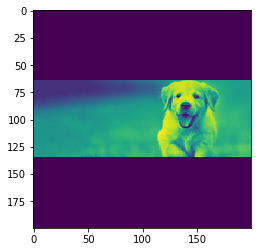

In [5]:
plt.imshow((all_images_gray_array[1000]))

In [6]:
file_names_array=array(data['cat']) 
pd.value_counts(pd.Series(file_names_array))

cat      711
horse    619
pig      603
dog      537
cow      400
dtype: int64

In [7]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
file_names_array_cat= encoder.fit_transform(file_names_array)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images_gray_array, file_names_array, test_size=0.3)


In [9]:
img_rows, img_cols = 200, 200
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
##x_train /= 255
##x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (2009, 200, 200, 1)
2009 train samples
861 test samples


### run only if its a binary variable

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train= encoder.fit_transform(y_train)
y_train=np.hstack((y_train, 1 - y_train))
y_test= encoder.fit_transform(y_test)
y_test=np.hstack((y_test, 1 - y_test))
##print(y_train)

In [10]:
### run only if its a multi class dependent variable
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train= encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)
##print(y_train)

In [11]:
x_train_rot=[]
y_train_rot=[]
for i in range(len(x_train)):
    x_train_rot.append(x_train[i])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i][::-1,:,:])
    y_train_rot.append(y_train[i])
    
    x_train_rot.append(x_train[i][:,::-1,:])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i].transpose([1,0,2]))
    y_train_rot.append(y_train[i])
x_train_rot = np.array(x_train_rot,dtype='float32')
y_train_rot = np.array(y_train_rot,dtype='float32')
len(x_train_rot)

8036

In [12]:

from pandas_ml import ConfusionMatrix
def model_eval():
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append(1)
        if ((y_test[i][1])==1):
            y_test_list.append(2)

    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test_list,predicted_classes)
    ### got from https://pandas-ml.readthedocs.io/en/latest/conf_mat.html

    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append("no")
        if ((y_test[i][1])==1):
            y_test_list.append("yes")


    ##from sklearn.metrics import confusion_matrix
    ##confusion_matrix(y_test_list,predicted_classes)
    predicted_classes_list=[]
    for label in predicted_classes:

        if (label==0):
            predicted_classes_list.append("no")
        if (label==1):
            predicted_classes_list.append("yes")

    confusion_matrix = ConfusionMatrix(y_test_list,predicted_classes_list)
    print("Confusion matrix:\n%s" % confusion_matrix)
    ##confusion_matrix.plot()
    ##confusion_matrix.print_stats()

In [13]:
batch_size =10
##batch_size = 5
num_classes = 5
##epochs = 10
epochs =20


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(4, 4),activation='relu'))

model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(8, 8), activation='relu'))

model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(32, 32),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))






model.add(Flatten())
model.add(Dense(28, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='sigmoid'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 32)        65568     
_________________________________________________________________
dropout_2 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        1048608   
__________

Train on 8036 samples, validate on 861 samples
Epoch 1/20
8036/8036 [==============================] - 244s 30ms/step - loss: 0.5012 - acc: 0.7980 - val_loss: 0.4720 - val_acc: 0.8000
Epoch 2/20
8036/8036 [==============================] - 208s 26ms/step - loss: 0.4636 - acc: 0.7991 - val_loss: 0.4494 - val_acc: 0.8009
Epoch 3/20
8036/8036 [==============================] - 207s 26ms/step - loss: 0.4466 - acc: 0.8011 - val_loss: 0.4329 - val_acc: 0.8058
Epoch 4/20
8036/8036 [==============================] - 206s 26ms/step - loss: 0.4338 - acc: 0.8061 - val_loss: 0.4235 - val_acc: 0.8102
Epoch 5/20
8036/8036 [==============================] - 206s 26ms/step - loss: 0.4224 - acc: 0.8129 - val_loss: 0.4142 - val_acc: 0.8200
Epoch 6/20
8036/8036 [==============================] - 206s 26ms/step - loss: 0.4101 - acc: 0.8182 - val_loss: 0.4590 - val_acc: 0.7977
Epoch 7/20
8036/8036 [==============================] - 206s 26ms/step - loss: 0.3980 - acc: 0.8245 - val_loss: 0.4009 - val_acc: 0

ValueError: Found input variables with inconsistent numbers of samples: [331, 861]

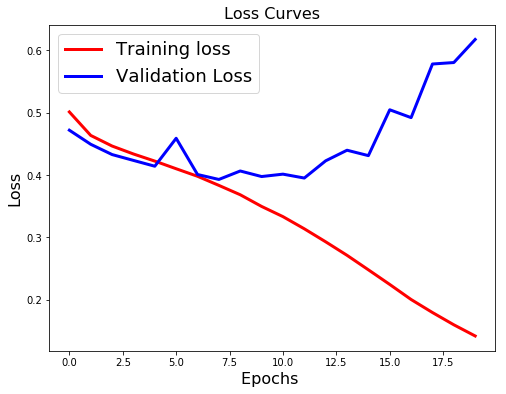

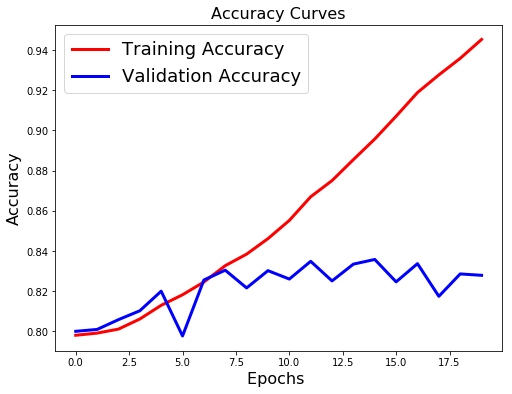

In [14]:


history = model.fit(x_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
model_eval()

Test loss: 0.617469362611693
Test accuracy: 0.8278745665505927


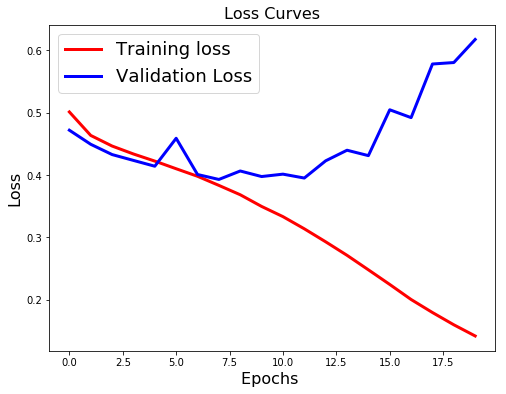

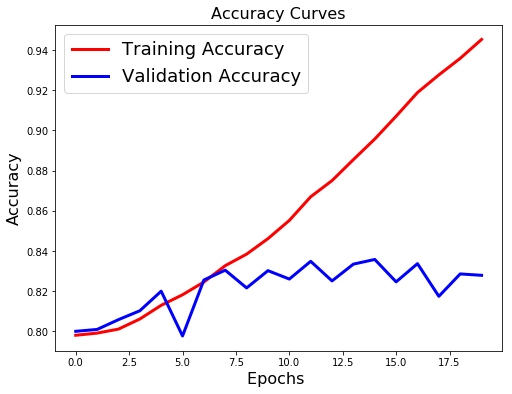

In [19]:

from pandas_ml import ConfusionMatrix
def model_eval():
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    predicted_classes = model.predict_classes(x_test)






   
model_eval()